In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import elasticite as el
import numpy as np
duration = el.get_default_args(el.EdgeGrid.render)['duration']

In [ ]:
import sys
sys.path.append('..')
from scenario_line_fresnel import EdgeGrid
e = EdgeGrid(N_lame=25, grid_type='line')
e.render(fps=50, fname='../files/fresnel.mp4')

In [ ]:
from scenario_line_elastic_fresnel import EdgeGrid
e = EdgeGrid(N_lame=25, grid_type='line')
e.render(fps=50., duration=10, fname='../files/elastic_fresnel.mp4')

## controls

Le point focal bouge à gauche de l'observateur.

In [ ]:
import elasticite as el
import numpy as np

duration = el.get_default_args(el.EdgeGrid.render)['duration']
location = el.get_default_args(el.EdgeGrid.render)['location']


class EdgeGrid(el.EdgeGrid):
    def champ(self):
        if self.structure: N_lame = self.N_lame-self.struct_N
        else: N_lame = self.N_lame
        tf = 2. #how many cycles in one period (duration)
        force = np.zeros_like(self.lames[2, :N_lame])
        damp = lambda t: 0.01 #* np.exp(np.cos(t / 6.) / 3.**2)
        xf = lambda t: location[0] - self.total_width/4.
        zf = lambda t: location[2] * (.5 + .45 * np.sin(2*np.pi*self.t*tf/duration))
        
        desired_angle = np.pi/2 + np.arctan2(self.lames[1, :N_lame]-zf(self.t), self.lames[0, :N_lame]-xf(self.t))
        self.lames[2, :N_lame] = np.mod(self.lames[2, :N_lame]-np.pi/2, np.pi) + np.pi/2
        force += np.mod(desired_angle-np.pi/2, np.pi) + np.pi/2- self.lames[2, :N_lame]
        force -= damp(self.t) * self.lames[3, :N_lame]/self.dt
        return 3. * force

e = EdgeGrid(N_lame=25, grid_type='line')
e.render(fps=50., duration=10, fname='../files/elastic_fresnel_gauche.mp4')

Lateral movement from right to left

In [ ]:
class EdgeGrid(el.EdgeGrid):
    def champ(self):
        if self.structure: N_lame = self.N_lame-self.struct_N
        else: N_lame = self.N_lame
        tf = 2. #how many cycles in one period (duration)
        force = np.zeros_like(self.lames[2, :N_lame])
        damp = lambda t: 0.01 #* np.exp(np.cos(t / 6.) / 3.**2)
        xf = lambda t: location[0] + 2. * np.sin(2*np.pi*self.t*tf/duration)
        zf = lambda t: location[2]
        
        desired_angle = np.pi/2 + np.arctan2(self.lames[1, :N_lame]-zf(self.t), self.lames[0, :N_lame]-xf(self.t))
        self.lames[2, :N_lame] = np.mod(self.lames[2, :N_lame]-np.pi/2, np.pi) + np.pi/2
        force += np.mod(desired_angle-np.pi/2, np.pi) + np.pi/2- self.lames[2, :N_lame]
        force -= damp(self.t) * self.lames[3, :N_lame]/self.dt
        return 3. * force

e = EdgeGrid(N_lame=25, grid_type='line')
e.render(fps=50., duration=10, fname='../files/elastic_fresnel_lateral.mp4')

Circular movement

In [ ]:
class EdgeGrid(el.EdgeGrid):
    def champ(self):
        if self.structure: N_lame = self.N_lame-self.struct_N
        else: N_lame = self.N_lame
        tf = 2. #how many cycles in one period (duration)
        force = np.zeros_like(self.lames[2, :N_lame])
        damp = lambda t: 0.01 #* np.exp(np.cos(t / 6.) / 3.**2)
        xf = lambda t: location[0] + 2. * np.sin(2*np.pi*self.t*tf/duration)
        zf = lambda t: location[2] * (.5 + .45 * np.sin(2*np.pi*self.t*tf/duration))
        
        desired_angle = np.pi/2 + np.arctan2(self.lames[1, :N_lame]-zf(self.t), self.lames[0, :N_lame]-xf(self.t))
        self.lames[2, :N_lame] = np.mod(self.lames[2, :N_lame]-np.pi/2, np.pi) + np.pi/2
        force += np.mod(desired_angle-np.pi/2, np.pi) + np.pi/2- self.lames[2, :N_lame]
        force -= damp(self.t) * self.lames[3, :N_lame]/self.dt
        return 3. * force

e = EdgeGrid(N_lame=25, grid_type='line')
e.render(fps=50., duration=10, fname='../files/elastic_fresnel_rot.mp4')

Simulation des pas du moteur

In [ ]:
class EdgeGrid(el.EdgeGrid):
    def champ(self):
        if self.structure: N_lame = self.N_lame-self.struct_N
        else: N_lame = self.N_lame
        tf = 2. #how many cycles in one period (duration)
        force = np.zeros_like(self.lames[2, :N_lame])
        damp = lambda t: 0.01 #* np.exp(np.cos(t / 6.) / 3.**2)
        xf = lambda t: location[0] #+ 2. * np.sin(2*np.pi*self.t*tf/duration)
        zf = lambda t: location[2] * (.5 + .45 * np.sin(2*np.pi*self.t*tf/duration))
        
        desired_angle = np.pi/2 + np.arctan2(self.lames[1, :N_lame]-zf(self.t), self.lames[0, :N_lame]-xf(self.t))
        self.lames[2, :N_lame] = np.mod(self.lames[2, :N_lame]-np.pi/2, np.pi) + np.pi/2
        force += np.mod(desired_angle-np.pi/2, np.pi) + np.pi/2- self.lames[2, :N_lame]
        force -= damp(self.t) * self.lames[3, :N_lame]/self.dt
        return 3. * force

    def update(self):
        if self.structure: N_lame = self.N_lame-self.struct_N
        else: N_lame = self.N_lame
        self.lames[2, :N_lame] += self.lames[3, :N_lame]*self.dt/2
        self.lames[3, :N_lame] += self.champ() * self.dt
        self.lames[2, :N_lame] += self.lames[3, :N_lame]*self.dt/2
        self.lames[2, :N_lame] = np.floor(self.lames[2, :N_lame] / np.pi* self.n_pas ) / self.n_pas * np.pi

e = EdgeGrid(N_lame=25, grid_type='line')
e.n_pas = 150.
e.render(fps=50., duration=10, fname='../files/elastic_fresnel_pasapas.mp4')

In [3]:
%%writefile ../scenario_line_contraint.py
#!/usr/bin/env python
# -*- coding: utf8 -*-

"""

Sur une ligne de lames, on fait tourner les lames avec un mouvement relativement élastique mais exogene (prédeterminé, pas émergent)

"""

import elasticite as el
import numpy as np

class EdgeGrid(el.EdgeGrid):
    def update(self):
        if self.structure: N_lame = self.N_lame-self.struct_N
        else: N_lame = self.N_lame
        self.lames[2, :N_lame] = 90.* np.pi/180. * np.sin(2*np.pi*(self.t)/self.period)

if __name__ == "__main__":
    import sys
    if len(sys.argv)>1: mode = sys.argv[1]
    else: mode = 'both'

    #e = EdgeGrid(N_lame=25, grid_type='line', mode=mode, verb=False, period=30)
    # to test writing / reading from a file
    e = EdgeGrid(N_lame=25, grid_type='line', mode=mode, verb=True, period=30, filename='/tmp/line_contraint.npy')
    el.main(e)


Overwriting ../scenario_line_contraint.py


In [4]:
%%writefile ../scenario_line_elastic_fresnel.py
#!/usr/bin/env python
# -*- coding: utf8 -*-

"""

Sur une ligne de lames, on fait tourner les lames avec un mouvement relativement élastique mais exogene (prédeterminé, pas émergent)

"""

import elasticite as el
import numpy as np

duration = el.get_default_args(el.EdgeGrid.render)['duration']
location = el.get_default_args(el.EdgeGrid.render)['location']

class EdgeGrid(el.EdgeGrid):
    def champ(self):
        if self.structure: N_lame = self.N_lame-self.struct_N
        else: N_lame = self.N_lame

        force = np.zeros_like(self.lames[2, :N_lame])
        damp_min = 0.01
        damp_tau = 1.5
        damp_angle_tau = 14.
        damp = lambda t: damp_min + (1.-damp_min)*np.exp(-np.abs(np.mod(t+self.period/2, self.period)-self.period/2)/damp_tau)
        damp_angle = lambda t: 1.-np.exp(-(np.mod(t+self.period/2, self.period)-self.period/2)**2/2/damp_angle_tau**2)
        xf = lambda t: location[0]
        zf = lambda t: location[2] + 3.5 * np.sin(2*np.pi*(t)/self.period)
        smooth = lambda t: 1.-np.exp(-np.abs(np.mod(t+self.period/2, self.period)-self.period/2)**2/damp_tau**2)

        desired_angle = np.arctan2(self.lames[1, :N_lame]-zf(self.t), self.lames[0, :N_lame]-xf(self.t)) - np.pi/2
        # self.lames[2, :N_lame] = np.mod(self.lames[2, :]-np.pi/2, np.pi) + np.pi/2
        #print (damp_angle(self.t), desired_angle)
        force += (damp_angle(self.t)*(np.mod(desired_angle+np.pi/2, np.pi) - np.pi/2) - self.lames[2, :N_lame]) *smooth(self.t)
        force -= 12 * (np.mod(self.lames[2, :N_lame]+np.pi/2, np.pi) - np.pi/2) * (1- smooth(self.t) )
        #print (force)
        force -= damp(self.t) * self.lames[3, :N_lame]/self.dt
        #force *= damp_force(self.t) #* self.lames[3, :N_lame]/self.dt
#         print (damp(self.t), self.t, self.period)
        return 3. * force

if __name__ == "__main__":
    import sys
    if len(sys.argv)>1: mode = sys.argv[1]
    else: mode = 'both'
    filename = None
    filename = 'mat/line_fresnelastique.npy'
    e = EdgeGrid(N_lame=25, grid_type='line', mode=mode, verb=False, filename=filename, period=120.)
    el.main(e)

    

Overwriting ../scenario_line_elastic_fresnel.py


In [5]:
%cd ..
!rm mat/line_fresnelastique.npy
%run  scenario_line_elastic_fresnel.py writer
%cd posts

/Users/laurentperrinet/cloud_nas/science/elasticte
/Users/laurentperrinet/cloud_nas/science/elasticte/posts


/usr/local/lib/python3.5/site-packages/matplotlib/__init__.py:1350: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


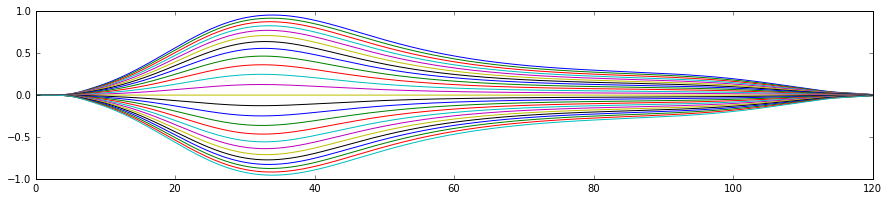

In [6]:
import matplotlib
matplotlib.use('nbagg')
%matplotlib inline
import matplotlib.pyplot as plt

z = np.load('../mat/line_fresnelastique.npy')
fig, ax = plt.subplots(figsize=(15, 3))
#_ = ax.plot(z[:, 0])
_ = ax.plot(z[:, 0], z[:, 1:])

In [7]:
%%writefile ../scenario_line_elastic_fresnel_chirp.py
#!/usr/bin/env python
# -*- coding: utf8 -*-

"""

Sur une ligne de lames, on fait tourner les lames avec un mouvement relativement élastique mais exogene (prédeterminé, pas émergent)

"""

import elasticite as el
import numpy as np

duration = el.get_default_args(el.EdgeGrid.render)['duration']
location = el.get_default_args(el.EdgeGrid.render)['location']


class EdgeGrid(el.EdgeGrid):
    def champ(self):
        if self.structure: N_lame = self.N_lame-self.struct_N
        else: N_lame = self.N_lame

        force = np.zeros_like(self.lames[2, :N_lame])
        damp_min = 0.01
        damp_tau = 1.5
        damp_angle_tau = 8.
        damp_chirp_tau = 20.
        damp = lambda t: damp_min + (1.-damp_min)*np.exp(-np.abs(np.mod(t+self.period/2, self.period)-self.period/2)/damp_tau)
        damp_angle = lambda t: 1.-np.exp(-(np.mod(t+self.period/2, self.period)-self.period/2)**2/2/damp_angle_tau**2)
        xf = lambda t: location[0]
        freq = lambda t: 4 +  100*np.exp(-np.abs(t/damp_chirp_tau))
        chirp = lambda t: np.sin(2*np.pi*t/self.period * freq(t))
        amp = lambda t: 1 - np.exp(-np.abs(t/damp_chirp_tau))
        zf = lambda t: location[2] + 3.5 * amp(t) * chirp(t)

        smooth_tau = 15
        smooth = lambda t: 1.-np.exp(-np.abs(np.mod(t+self.period/2, self.period)-self.period/2)**2/smooth_tau**2)
        
        #print(freq(self.t), damp(self.t))
        desired_angle = np.arctan2(self.lames[1, :N_lame]-zf(self.t), self.lames[0, :N_lame]-xf(self.t)) - np.pi/2
        force += (damp_angle(self.t)*(np.mod(desired_angle+np.pi/2, np.pi) - np.pi/2) - self.lames[2, :N_lame]) *smooth(self.t)
        force -= 12 * (np.mod(self.lames[2, :N_lame]+np.pi/2, np.pi) - np.pi/2) * (1- smooth(self.t) )
        force -= damp(self.t) * self.lames[3, :N_lame]/self.dt
        return 3. * force

if __name__ == "__main__":
    import sys
    if len(sys.argv)>1: mode = sys.argv[1]
    else: mode = 'both'
    filename = None
    filename = 'mat/line_fresnelastique_chirp.npy'
    e = EdgeGrid(N_lame=25, grid_type='line', mode=mode, verb=False, filename=filename, period=120.)
    el.main(e)

    

Overwriting ../scenario_line_elastic_fresnel_chirp.py


In [8]:
%cd ..
!rm mat/line_fresnelastique_chirp.npy
%run  scenario_line_elastic_fresnel_chirp.py writer
!ls -ltr mat/line_fresnelastique_chirp.npy
%cd posts

/Users/laurentperrinet/cloud_nas/science/elasticte
-rw-r--r--  1 laurentperrinet  staff  748880 Dec  2 16:18 mat/line_fresnelastique_chirp.npy
/Users/laurentperrinet/cloud_nas/science/elasticte/posts


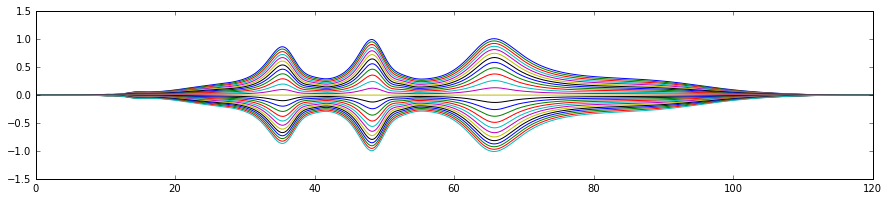

In [9]:
z = np.load('../mat/line_fresnelastique_chirp.npy')
fig, ax = plt.subplots(figsize=(15, 3))
#_ = ax.plot(z[:, 0])
_ = ax.plot(z[:, 0], z[:, 1:])

In [10]:
%%writefile ../scenario_line_elastic_fresnel_choc.py
#!/usr/bin/env python
# -*- coding: utf8 -*-

"""

Sur une ligne de lames, on fait tourner les lames avec un mouvement relativement élastique mais exogene (prédeterminé, pas émergent)

"""

import elasticite as el
import numpy as np

duration = el.get_default_args(el.EdgeGrid.render)['duration']
location = el.get_default_args(el.EdgeGrid.render)['location']


class EdgeGrid(el.EdgeGrid):
    def champ(self):
        if self.structure: N_lame = self.N_lame-self.struct_N
        else: N_lame = self.N_lame

        force = np.zeros_like(self.lames[2, :N_lame])
        damp_min = 0.01
        damp_tau = 1.5
        damp_angle_tau = 8.
        damp_chirp_tau = 20.
        damp = lambda t: damp_min + (1.-damp_min)*np.exp(-np.abs(np.mod(t+self.period/2, self.period)-self.period/2)/damp_tau)
        damp_angle = lambda t: 1.-np.exp(-(np.mod(t+self.period/2, self.period)-self.period/2)**2/2/damp_angle_tau**2)
        step_angle = lambda t: 1.*(t < 3*self.period/4)
        xf = lambda t: location[0]
        freq = lambda t: 4 +  100*np.exp(-np.abs(t/damp_chirp_tau))
        chirp = lambda t: np.sin(2*np.pi*t/self.period * freq(t))
        amp = lambda t: 1 - np.exp(-np.abs(t/damp_chirp_tau))
        zf = lambda t: location[2] + 3.5 * amp(t) * chirp(t) * step_angle(t)

        smooth_tau = 15
        smooth = lambda t: 1.-np.exp(-np.abs(np.mod(t+self.period/2, self.period)-self.period/2)**2/smooth_tau**2)
        force -= 12 * (np.mod(self.lames[2, :N_lame]+np.pi/2, np.pi) - np.pi/2) * (1- smooth(self.t) )
        
        #print(freq(self.t), damp(self.t))
        desired_angle = np.arctan2(self.lames[1, :N_lame]-zf(self.t), self.lames[0, :N_lame]-xf(self.t)) - np.pi/2
        force += (damp_angle(self.t)*(np.mod(desired_angle+np.pi/2, np.pi) - np.pi/2) - self.lames[2, :N_lame]) *smooth(self.t)
        force -= damp(self.t) * self.lames[3, :N_lame]/self.dt
        return 3. * force

if __name__ == "__main__":
    import sys
    if len(sys.argv)>1: mode = sys.argv[1]
    else: mode = 'both'
    filename = None
    filename = 'mat/line_fresnelastique_choc.npy'
    e = EdgeGrid(N_lame=25, grid_type='line', mode=mode, verb=False, filename=filename, period=120.)
    el.main(e)

    

Overwriting ../scenario_line_elastic_fresnel_choc.py


In [11]:
%cd ..
!rm mat/line_fresnelastique_choc.npy
%run  scenario_line_elastic_fresnel_choc.py writer
!ls -ltr mat/line_fresnelastique_choc.npy
%cd posts

/Users/laurentperrinet/cloud_nas/science/elasticte
-rw-r--r--  1 laurentperrinet  staff  748880 Dec  2 16:18 mat/line_fresnelastique_choc.npy
/Users/laurentperrinet/cloud_nas/science/elasticte/posts


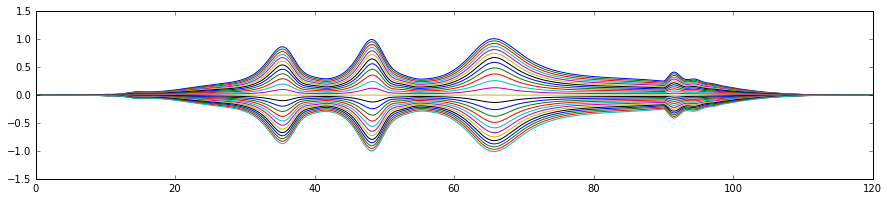

In [12]:
z = np.load('../mat/line_fresnelastique_choc.npy')
fig, ax = plt.subplots(figsize=(15, 3))
#_ = ax.plot(z[:, 0])
_ = ax.plot(z[:, 0], z[:, 1:])

## git

In [13]:
!git s

 M ../scenario_line_elastic_fresnel.py


In [14]:
!git commit -m' scenario fresnel ' -a

[master 7e0fdfd]  scenario fresnel
 1 file changed, 1 deletion(-)


In [15]:
! git push

Counting objects: 3, done.
Delta compression using up to 4 threads.
Compressing objects: 100% (3/3), done.
Writing objects: 100% (3/3), 305 bytes | 0 bytes/s, done.
Total 3 (delta 2), reused 0 (delta 0)
To git@git.framasoft.org:laurentperrinet/elasticte.git
   c430ec4..7e0fdfd  master -> master
